<a href="https://colab.research.google.com/github/Metastasiz/data_analysis/blob/main/fi_data/stock_analysis_01/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Data Analysis Project

This project aims to analyze stock data to improve investment decisions by

+ **Identifying Opportunities:** Stock data analysis helps investors find potentially profitable investment opportunities. By studying historical price trends, financial ratios, and market indicators, they can identify stocks that are undervalued or poised for growth.
+ **Risk Management:** Analysis allows investors to assess the risk associated with different stocks or portfolios. By understanding volatility, correlations, and market trends, they can make informed decisions to manage their risk exposure.
+ **Portfolio Optimization:** Analyzing stock data helps create a diversified portfolio with the desired risk-return profile. By understanding how different stocks behave in relation to each other and the overall market, investors can allocate their investments effectively.

The process is broken down into the following steps:
#1. Define Use Case

This initial step involves clearly defining the objectives and goals of the project. It should answer questions like:

##Problem:

Investors face the challenge of selecting stocks for their portfolios that align with their risk tolerance and return expectations. Analyzing a large number of stocks and understanding their individual characteristics, market relationships, and potential risks can be a time-consuming and complex process.

##Solution:

This notebook provides a framework for analyzing stock data to assist investors in making informed investment decisions. It leverages various analytical techniques, including:

+ Moving Average Analysis: Identifying trends and potential buy/sell signals using moving averages.
+ MACD Analysis: Assessing momentum and potential trend reversals with the Moving Average Convergence Divergence indicator.
+ Daily Return Analysis: Evaluating the daily performance of stocks and the market.
+ Beta Calculation: Quantifying the systematic risk of individual stocks compared to the market.
+ Risk and Volatility Analysis: Measuring the fluctuations in daily returns using standard deviation over different time windows.
+ Correlation Analysis: Identifying relationships between stock prices and the market using both closing prices and daily returns.

#2. Run ETL Pipeline

This step is crucial for preparing the stock data for analysis. It involves three sub-steps:

##**a) Data Collection:**

+ Identify relevant data sources: such as stock market APIs, financial data providers, or existing datasets.
+ Gather the required data: historical stock prices, financial ratios, market indicators, etc.

##**b) Data Preprocessing:**

+ Remove duplicates: Identify and eliminate any duplicate records to avoid bias and ensure data integrity.
+ Remove irrelevant data: Discard any columns or features that are not relevant to the analysis, such as unnecessary metadata or unrelated information.
+ Fix errors: Correct any data entry errors, inconsistencies, or outliers that could affect the accuracy of the analysis.
+ Check for missing values: Identify and handle missing data using appropriate techniques, such as imputation or removal.

##**c) Load Data:**

+ Load the preprocessed data into a suitable data structure: like a pandas DataFrame or a database table.
+ Ensure data consistency and integrity: by validating the loaded data and performing data quality checks.
+ Prepare the data for further analysis: by organizing and structuring it appropriately.

#3. Exploratory Data Analysis (EDA)

This step involves exploring the data to gain insights and understand its characteristics:

  + Descriptive statistics: calculate basic statistics to summarize the data, like mean, median, standard deviation, etc.
  + Data visualization: create plots and charts to visualize patterns, trends, and relationships in the data.
  + Correlation analysis: examine relationships between different variables, like price and volume.
  + Identify potential issues: such as outliers or inconsistencies that may need further investigation.

#4. Data Visualization

This step focuses on presenting the insights gained from EDA in a clear and concise manner using various visualization techniques:

  + Charts and graphs: create visualizations that effectively communicate the findings, like line charts, bar charts, scatter plots, etc.
  + Interactive dashboards: develop interactive dashboards for data exploration and visualization.
  + Storytelling: present the results in a compelling narrative that highlights key insights and recommendations.

#5. Conclusion

This final step involves summarizing the findings and drawing conclusions based on the analysis:

  + Key insights: identify the most significant insights and patterns found in the data.
  + Investment recommendations: provide recommendations based on the analysis for portfolio optimization, risk management, and investment opportunities.
  + Future directions: outline potential future steps for further research or model development.


**Initial Setup**

We will be installing the necessary libraries and importing them. Please note that I'm using Google Colab for this project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression


We will be using my own library for this project, Metastasiz, which will help us get the absolute path of the file. While it is not necessary, it might be needed if you're running on your local IDE and if you switching a lot between OS.

In [ ]:
import os
import sys
!{sys.executable} -m pip install metastasiz
import metastasiz as mz

**Data Collection**

Firstly, we will we getting the data from the path in google drive

In [ ]:
# Data Collection - 1
targetName = "individual_stocks_5yr"
filePath = "drive/MyDrive/data_storage/" + targetName
fullPath = mz.getPath("content",filePath)
#fullPath = "content/drive/MyDrive/data_storage/"
files = os.listdir(fullPath)
try:
  files.remove(".xlsx")
except:
  pass
files

['XLNX_data.csv',
 'XEL_data.csv',
 'VLO_data.csv',
 'WLTW_data.csv',
 'VMC_data.csv',
 'URI_data.csv',
 'WMT_data.csv',
 'VZ_data.csv',
 'UPS_data.csv',
 'WY_data.csv',
 'WEC_data.csv',
 'VRSK_data.csv',
 'XRAY_data.csv',
 'WAT_data.csv',
 'V_data.csv',
 'VAR_data.csv',
 'WM_data.csv',
 'WFC_data.csv',
 'USB_data.csv',
 'XRX_data.csv',
 'VIAB_data.csv',
 'XEC_data.csv',
 'ZION_data.csv',
 'VFC_data.csv',
 'VRSN_data.csv',
 'LYB_data.csv',
 'SNA_data.csv',
 'LUV_data.csv',
 'HP_data.csv',
 'WMB_data.csv',
 'PVH_data.csv',
 'XYL_data.csv',
 'MO_data.csv',
 'KMX_data.csv',
 'ZTS_data.csv',
 'MGM_data.csv',
 'O_data.csv',
 'SYY_data.csv',
 'VNO_data.csv',
 'HRS_data.csv',
 'IR_data.csv',
 'VRTX_data.csv',
 'WHR_data.csv',
 'VTR_data.csv',
 'WYN_data.csv',
 'XL_data.csv',
 'HCP_data.csv',
 'TXN_data.csv',
 'MAT_data.csv',
 'WBA_data.csv',
 'IVZ_data.csv',
 'HSY_data.csv',
 'WU_data.csv',
 'MAA_data.csv',
 'PFE_data.csv',
 'MSI_data.csv',
 'HAS_data.csv',
 'XOM_data.csv',
 'ICE_data.csv',
 

We will verify the data we've imported if there is error or if we've imported the correct files.

In [ ]:
# Data Collection - 2
df_raw_all = pd.DataFrame()

for e in files:
  df_temp = pd.read_csv(fullPath / e)
  df_raw_all = pd.concat([df_raw_all, df_temp], ignore_index=True)

df_raw_all

date   open    high      low  close   volume  Name
0       2013-02-08  37.00  37.630  36.9700  37.51  3721016  XLNX
1       2013-02-11  37.46  37.575  37.2650  37.46  2004285  XLNX
2       2013-02-12  37.35  37.710  37.2200  37.58  1859525  XLNX
3       2013-02-13  37.63  38.000  37.4800  37.80  2908631  XLNX
4       2013-02-14  37.61  38.620  37.4200  38.44  4376224  XLNX
...            ...    ...     ...      ...    ...      ...   ...
624071  2018-02-01  77.53  78.260  76.5000  77.55  1896685   DVA
624072  2018-02-02  77.21  77.370  75.2100  75.65  1577999   DVA
624073  2018-02-05  75.23  76.300  72.7900  72.84  1764489   DVA
624074  2018-02-06  71.57  74.740  70.5000  74.03  1578492   DVA
624075  2018-02-07  73.85  75.640  73.6583  74.66  1010894   DVA

[624076 rows x 7 columns]

We want to setup some static variable names, so the chance of typo is reduced. We also want to see how many stocks we're dealing with.

In [ ]:
# Data Collection - 3
__seperator = "_"
#
__date = "date"
__stock = "Name"
__date = "date"
__stock = "Name"
__open = "open"
__high = "high"
__low = "low"
__close = "close"
__volume = "volume"
__market = "Market"

stock_list = df_raw_all[__stock].unique()

print(len(stock_list))
stock_list

505


array(['XLNX', 'XEL', 'VLO', 'WLTW', 'VMC', 'URI', 'WMT', 'VZ', 'UPS',
       'WY', 'WEC', 'VRSK', 'XRAY', 'WAT', 'V', 'VAR', 'WM', 'WFC', 'USB',
       'XRX', 'VIAB', 'XEC', 'ZION', 'VFC', 'VRSN', 'LYB', 'SNA', 'LUV',
       'HP', 'WMB', 'PVH', 'XYL', 'MO', 'KMX', 'ZTS', 'MGM', 'O', 'SYY',
       'VNO', 'HRS', 'IR', 'VRTX', 'WHR', 'VTR', 'WYN', 'XL', 'HCP',
       'TXN', 'MAT', 'WBA', 'IVZ', 'HSY', 'WU', 'MAA', 'PFE', 'MSI',
       'HAS', 'XOM', 'ICE', 'WRK', 'LEG', 'MRK', 'MCK', 'WDC', 'KR',
       'RRC', 'RSG', 'PLD', 'WYNN', 'NUE', 'OKE', 'YUM', 'GPS', 'INFO',
       'UTX', 'ZBH', 'LB', 'TSCO', 'SHW', 'HLT', 'SPGI', 'UAA', 'IFF',
       'NEE', 'MAS', 'SJM', 'SYF', 'PGR', 'IT', 'ROK', 'TJX', 'JWN',
       'SRE', 'MCO', 'LKQ', 'NOC', 'MYL', 'GE', 'FOX', 'MTD', 'L', 'MPC',
       'ORLY', 'NTAP', 'NFX', 'LLL', 'ORCL', 'T', 'HBAN', 'PCAR', 'RL',
       'NWL', 'TEL', 'KSS', 'SLG', 'KLAC', 'M', 'GRMN', 'IP', 'MDT', 'LH',
       'HCA', 'NSC', 'PSX', 'PG', 'PAYX', 'TRIP', 'SCG', 'HD', 'NAVI

**Data Preprocessing**

We will begin the data preprocessing step. Firstly, we will see if there is any irrelenant features. And we will fix any error we find in the initial preprocess.

In [ ]:
#Data Preprocessing - 1
df_prep_all = df_raw_all.copy()
#No irrelevant feature
#Fixing a data type on the Date
print(df_prep_all.dtypes)
df_prep_all[__date] = pd.to_datetime(df_prep_all[__date])

df_prep_all.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

We will be checking any duplication, we will remove all copy except 1 from the duplication.

In [ ]:
#Data Preprocessing - 2
#Chekcing missing values and duplication
df_temp = df_prep_all[df_raw_all.duplicated(keep=False)]
print(df_temp)
print(df_temp[df_temp[__date]==df_temp[__date].iloc[0]])
df_prep_all.drop_duplicates(inplace=True)
print("Duplication of",len(df_prep_all[df_prep_all.duplicated(keep=False)]))

df_prep_all

             date   open    high     low  close    volume Name
58426  2013-02-08  33.61  34.290  33.555  34.28  13022820  TXN
58427  2013-02-11  34.18  34.190  33.660  33.69   8274909  TXN
58428  2013-02-12  33.59  33.700  33.410  33.56   7055415  TXN
58429  2013-02-13  33.62  33.885  33.540  33.72   5424613  TXN
58430  2013-02-14  33.49  33.840  33.300  33.79   6394142  TXN
...           ...    ...     ...     ...    ...       ...  ...
289357 2018-02-01  96.45  97.810  95.980  97.00   8997334  TWX
289358 2018-02-02  97.00  97.550  96.290  96.75   6076612  TWX
289359 2018-02-05  96.83  97.500  94.710  95.39   8111404  TWX
289360 2018-02-06  94.48  95.990  93.620  95.16  11414192  TWX
289361 2018-02-07  95.17  96.470  94.960  95.11   5192796  TWX

[10072 rows x 7 columns]
             date   open    high     low  close    volume Name
58426  2013-02-08  33.61  34.290  33.555  34.28  13022820  TXN
119078 2013-02-08  33.61  34.290  33.555  34.28  13022820  TXN
132835 2013-02-08  35.39  35.

date   open    high      low  close   volume  Name
0      2013-02-08  37.00  37.630  36.9700  37.51  3721016  XLNX
1      2013-02-11  37.46  37.575  37.2650  37.46  2004285  XLNX
2      2013-02-12  37.35  37.710  37.2200  37.58  1859525  XLNX
3      2013-02-13  37.63  38.000  37.4800  37.80  2908631  XLNX
4      2013-02-14  37.61  38.620  37.4200  38.44  4376224  XLNX
...           ...    ...     ...      ...    ...      ...   ...
624071 2018-02-01  77.53  78.260  76.5000  77.55  1896685   DVA
624072 2018-02-02  77.21  77.370  75.2100  75.65  1577999   DVA
624073 2018-02-05  75.23  76.300  72.7900  72.84  1764489   DVA
624074 2018-02-06  71.57  74.740  70.5000  74.03  1578492   DVA
624075 2018-02-07  73.85  75.640  73.6583  74.66  1010894   DVA

[619040 rows x 7 columns]

We will also be checking if there is any missing value, if there is too many, we might have to figure a way to replace them, either by mean value or some other ways.

In [ ]:
#Data Preprocessing - 3
#check missing value
print(df_prep_all.isnull().sum())
print(df_prep_all.dtypes)
df_prep_all[df_prep_all.isnull().any(axis=1)]
df_prep_all.dropna(inplace=True)
print(df_prep_all.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


**Load Data**

We will split the data into **Test and Train section**, with a ratio of 0.015, meaning we will pretend that the "Train section" is the market or S&P 500 and the "Test section" is a collection of individual stock we want to analyse.

We will also begin exporting the preprocessed data into a variable and save it. In my case we won't be saving it, although, if you'd like to save them, please uncomment the code.

In [ ]:
#load output
test_train_split = 0.015
split_num = int(len(stock_list)*test_train_split)
stock_test_list = df_prep_all[__stock].unique()[:split_num]
stock_train_list = df_prep_all[__stock].unique()[split_num:]
print("Total:",len(stock_list))
print("Test:",len(stock_test_list))
print(stock_test_list)
print("Train:",len(stock_train_list))
print(stock_train_list)

df_test = df_prep_all[df_prep_all[__stock].isin(stock_test_list)]
df_train = df_prep_all[df_prep_all[__stock].isin(stock_train_list)]

#Uncomment if you'd like to save
#df_train.to_csv(fullPath / "df_train.csv", index=False)
#df_test.to_csv(fullPath / "df_test.csv", index=False)
print(df_train.head())
print(df_test.head())

Total: 505
Test: 7
['XLNX' 'XEL' 'VLO' 'WLTW' 'VMC' 'URI' 'WMT']
Train: 498
['VZ' 'UPS' 'WY' 'WEC' 'VRSK' 'XRAY' 'WAT' 'V' 'VAR' 'WM' 'WFC' 'USB'
 'XRX' 'VIAB' 'XEC' 'ZION' 'VFC' 'VRSN' 'LYB' 'SNA' 'LUV' 'HP' 'WMB' 'PVH'
 'XYL' 'MO' 'KMX' 'ZTS' 'MGM' 'O' 'SYY' 'VNO' 'HRS' 'IR' 'VRTX' 'WHR'
 'VTR' 'WYN' 'XL' 'HCP' 'TXN' 'MAT' 'WBA' 'IVZ' 'HSY' 'WU' 'MAA' 'PFE'
 'MSI' 'HAS' 'XOM' 'ICE' 'WRK' 'LEG' 'MRK' 'MCK' 'WDC' 'KR' 'RRC' 'RSG'
 'PLD' 'WYNN' 'NUE' 'OKE' 'YUM' 'GPS' 'INFO' 'UTX' 'ZBH' 'LB' 'TSCO' 'SHW'
 'HLT' 'SPGI' 'UAA' 'IFF' 'NEE' 'MAS' 'SJM' 'SYF' 'PGR' 'IT' 'ROK' 'TJX'
 'JWN' 'SRE' 'MCO' 'LKQ' 'NOC' 'MYL' 'GE' 'FOX' 'MTD' 'L' 'MPC' 'ORLY'
 'NTAP' 'NFX' 'LLL' 'ORCL' 'T' 'HBAN' 'PCAR' 'RL' 'NWL' 'TEL' 'KSS' 'SLG'
 'KLAC' 'M' 'GRMN' 'IP' 'MDT' 'LH' 'HCA' 'NSC' 'PSX' 'PG' 'PAYX' 'TRIP'
 'SCG' 'HD' 'NAVI' 'NLSN' 'ROST' 'MNST' 'TXT' 'LUK' 'MMM' 'MET' 'MHK'
 'MRO' 'HOG' 'F' 'ILMN' 'JNJ' 'GWW' 'MU' 'KHC' 'STI' 'STZ' 'NWS' 'LOW'
 'PWR' 'NI' 'MON' 'PKI' 'UNM' 'SBAC' 'NRG' 'SCHW' 'MAR' 'HST

#Exploratory Data Analysis (EDA)

##Overview

We will begin the EDA step.
The main goal of this code is to prepare the data for an overview analysis, essentially creating a representation of the overall market and individual stock performance for visualization.

open        high         low       close  \
2013-02-08 00:00:00   58.193948   58.784618   57.924893   58.492232   
2013-02-11 00:00:00   58.480010   58.809608   58.011722   58.395011   
2013-02-12 00:00:00   58.443891   58.892662   58.076001   58.526144   
2013-02-13 00:00:00   58.600997   59.020892   58.160238   58.605105   
2013-02-14 00:00:00   58.408823   58.997847   57.993992   58.591631   
...                         ...         ...         ...         ...   
8077                 105.960000  106.560000  105.180000  105.520000   
8078                 105.150000  106.470000  104.150000  104.480000   
8079                 103.400000  104.610000   97.090000  100.090000   
8080                  97.640000  101.080000   97.250000  100.900000   
8081                 100.500000  104.590000  100.010000  102.850000   

                           volume       date Name  
2013-02-08 00:00:00  2.188793e+09        NaT  NaN  
2013-02-11 00:00:00  1.929632e+09        NaT  NaN  
2013-02-12 00:00:00  2.419971e+09        NaT  NaN  
2013-02-13 00:00:00  2.423844e+09        NaT  NaN  
2013-02-14 00:00:00  2.582793e+09        NaT  NaN  
...                           ...        ...  ...  
8077                 6.386836e+06 2018-02-01  WMT  
8078                 9.253068e+06 2018-02-02  WMT  
8079                 1.256159e+07 2018-02-05  WMT  
8080                 1.641380e+07 2018-02-06  WMT  
8081                 1.116522e+07 2018-02-07  WMT  

[9341 rows x 7 columns]

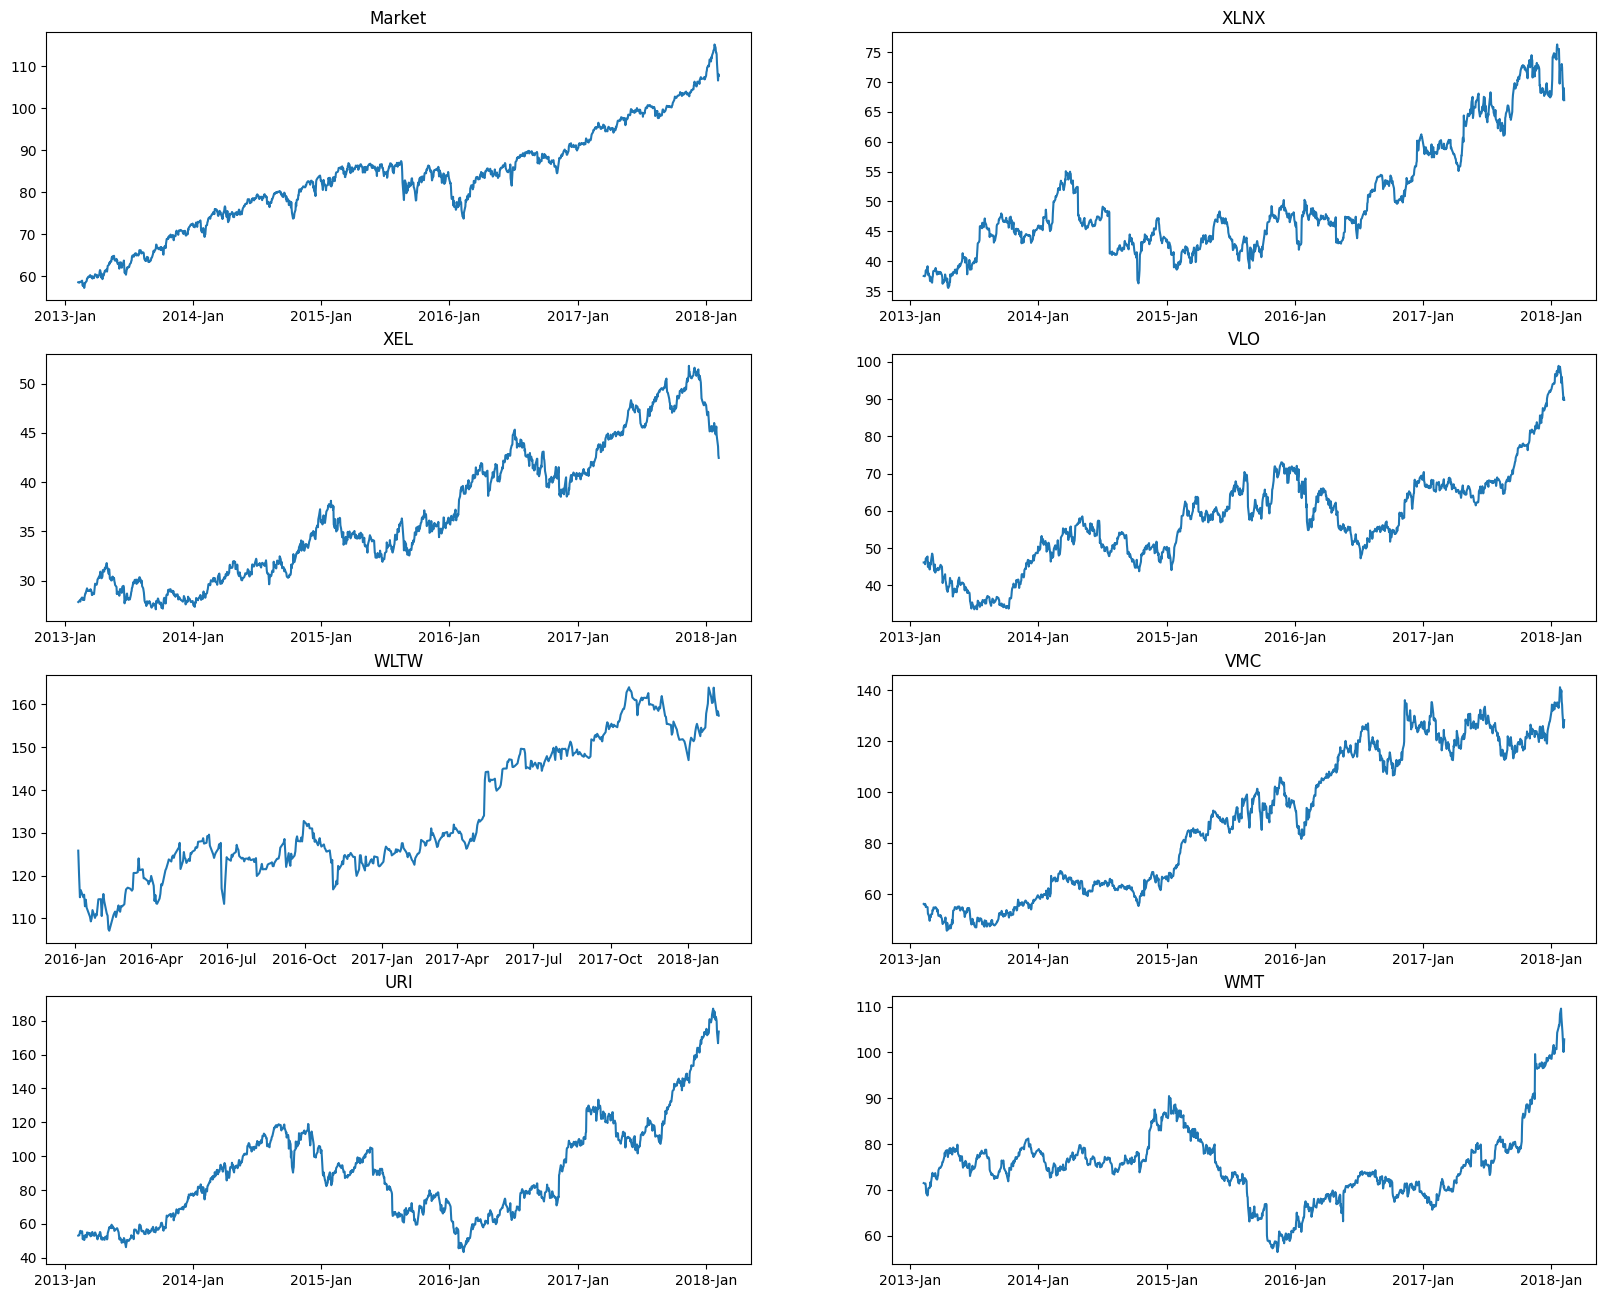

In [ ]:
#EDA
#Overview - Data Prep
df_out = pd.DataFrame()

pivot_index = __date
pivot_columns = __stock
pivot_values = [__open,__high,__low,__close,__volume]

df_market = df_train.copy()
df_market = df_market.pivot(index=pivot_index, columns=pivot_columns, values=pivot_values)

df_market.reset_index(inplace=True)
df_market.columns = [f'{ii}{__seperator}{i}' if ii != '' else f'{i}' for i,ii in df_market.columns]
df_market.columns = df_market.columns.get_level_values(0)
df_market.set_index(__date, inplace=True)

#This method assumes all stocks have equal weight in the market.
for value in pivot_values:
  df_market[value] = df_market[[stock+__seperator+value for stock in stock_train_list]].mean(axis=1)
df_market[__volume] = df_market[[stock+__seperator+__volume for stock in stock_train_list]].sum(axis=1)
for value in pivot_values:
  df_market.drop(columns=[stock+__seperator+value for stock in stock_train_list],inplace=True)

#Overview - Data Viz
plt.figure(figsize=(20,16))
#
plt.subplot(4,2,1)
plt.title(__market)
dateFormat = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dateFormat)
#
plt.plot(df_market[__close])
#
for i, stock in enumerate(stock_test_list, 2):
  plt.subplot(4,2, i)
  plt.title(stock)
  dateFormat = mdates.DateFormatter('%Y-%b')
  plt.gca().xaxis.set_major_formatter(dateFormat)
  #
  df_temp = df_test[df_test[__stock]==stock].copy()
  plt.plot(df_temp[__date], df_temp[__close])


##EDA - Moving Average
The primary goal of using Moving Averages (MA) in this stock analysis project is to smooth out price fluctuations and identify trends in the stock market and individual stock prices. Moving averages help to filter out noise and volatility, providing a clearer picture of the underlying price direction.

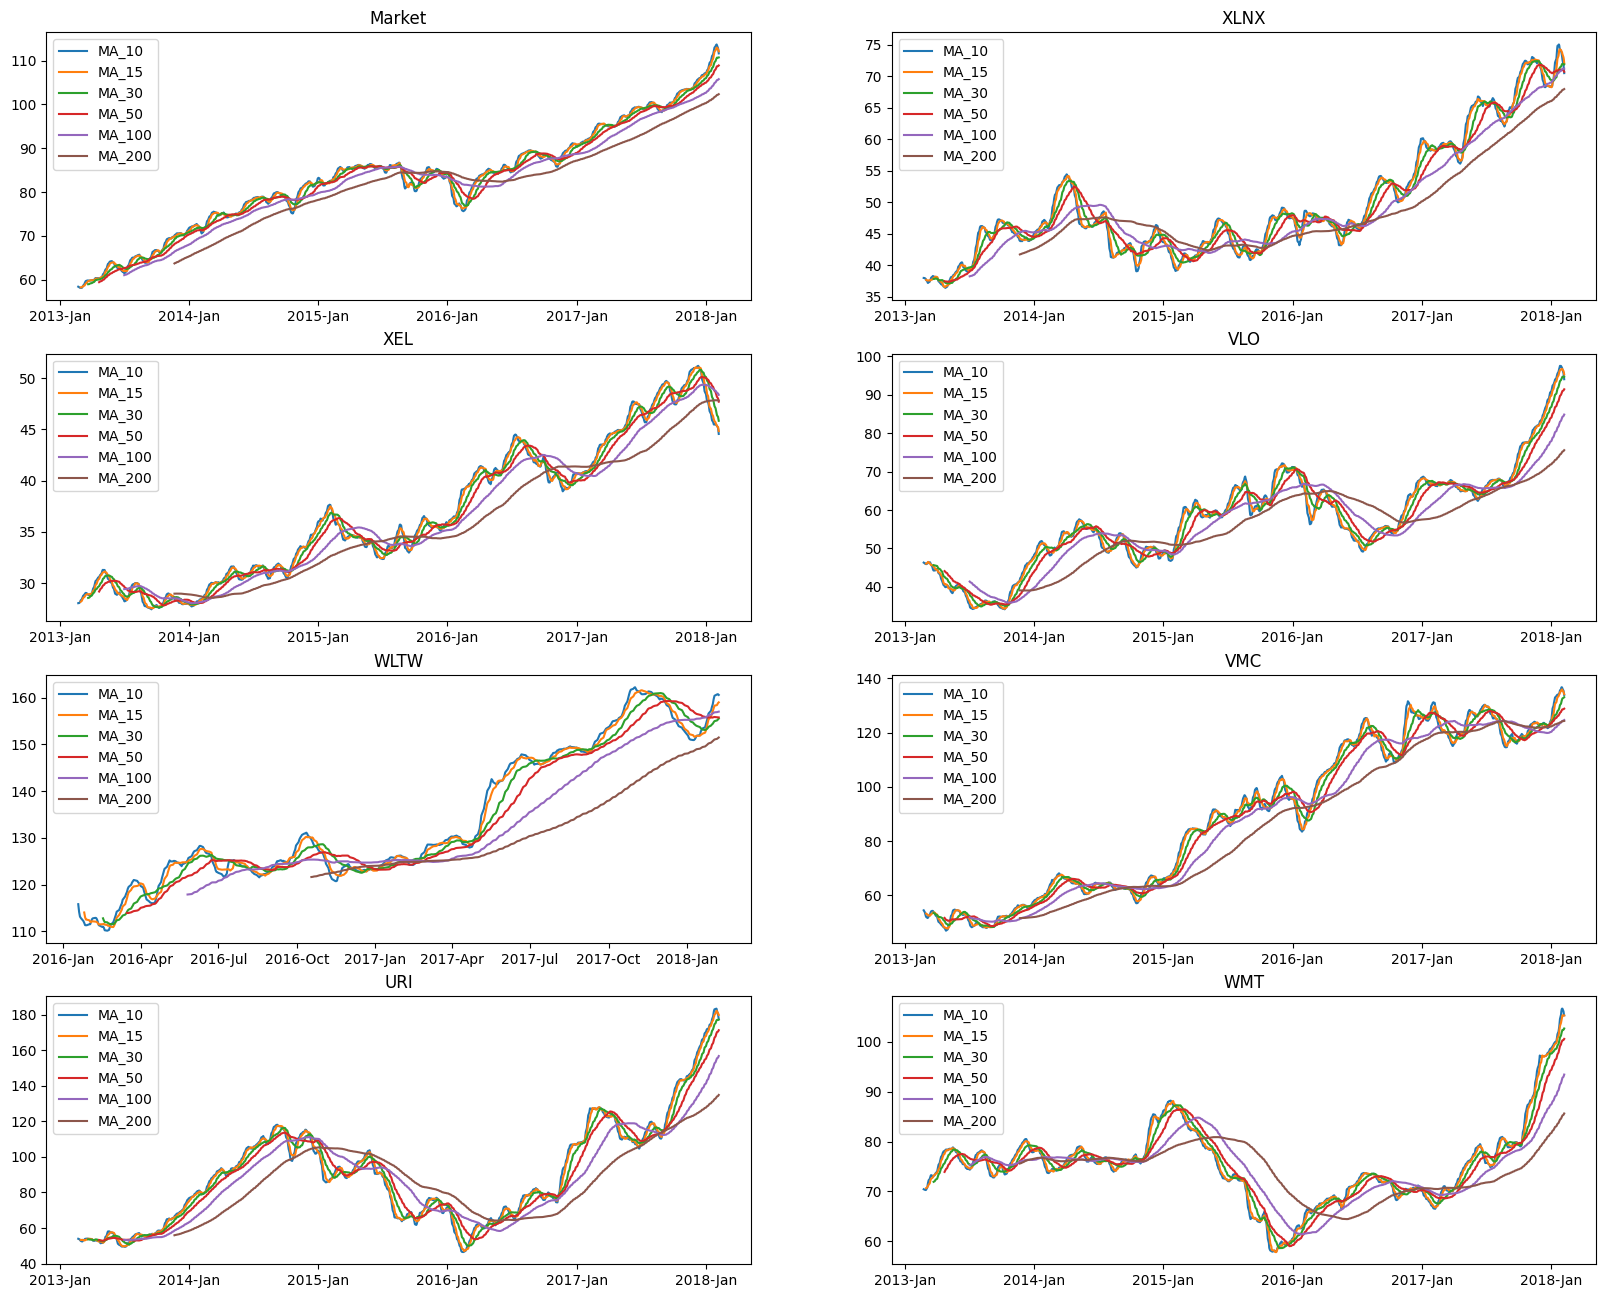

In [ ]:
#EDA
#Moving Average - Data Prep
__ma = "MA"

df_market_ma = pd.DataFrame()
df_test_ma = pd.DataFrame()

ma_interval = [10,15,30,50,100,200]
plot_ma_list = [__ma+__seperator+str(interval) for interval in ma_interval]
for i, interval in enumerate(ma_interval):
  df_market_ma[__ma+__seperator+str(interval)] = df_market[__close].rolling(window=interval).mean()

for i, stock in enumerate(stock_test_list,1):
  df_temp = df_test[df_test[__stock]==stock].copy()
  for ii, interval in enumerate(ma_interval):
    df_temp[__ma+__seperator+str(interval)] = df_temp[__close].rolling(window=interval).mean()
  df_test_ma = pd.concat([df_test_ma, df_temp], ignore_index=True)


#Moving Average - Data Viz
plt.figure(figsize=(20,16))
#
plt.subplot(4,2, 1)
plt.title(__market)
dateFormat = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dateFormat)
#
plt.plot(df_market_ma[plot_ma_list])
plt.legend(plot_ma_list)
#
for i, stock in enumerate(stock_test_list, 2):
  plt.subplot(4,2, i)
  plt.title(stock)
  dateFormat = mdates.DateFormatter('%Y-%b')
  plt.gca().xaxis.set_major_formatter(dateFormat)
  #
  df_temp = df_test_ma[df_test_ma[__stock]==stock].copy()
  df_temp.set_index(__date,inplace=True)
  plt.plot(df_temp[plot_ma_list])
  plt.legend(plot_ma_list)

##EDA - Moving Average Convergence Divergence (MACD)

The MACD is a momentum indicator that shows the relationship between two moving averages of prices. It is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The result is the MACD line. A nine-period EMA of the MACD, called the "signal line," is then plotted on top of the MACD line. This provides buy and sell signals. Traders often use the MACD to identify potential trend reversals or momentum shifts in stock prices.

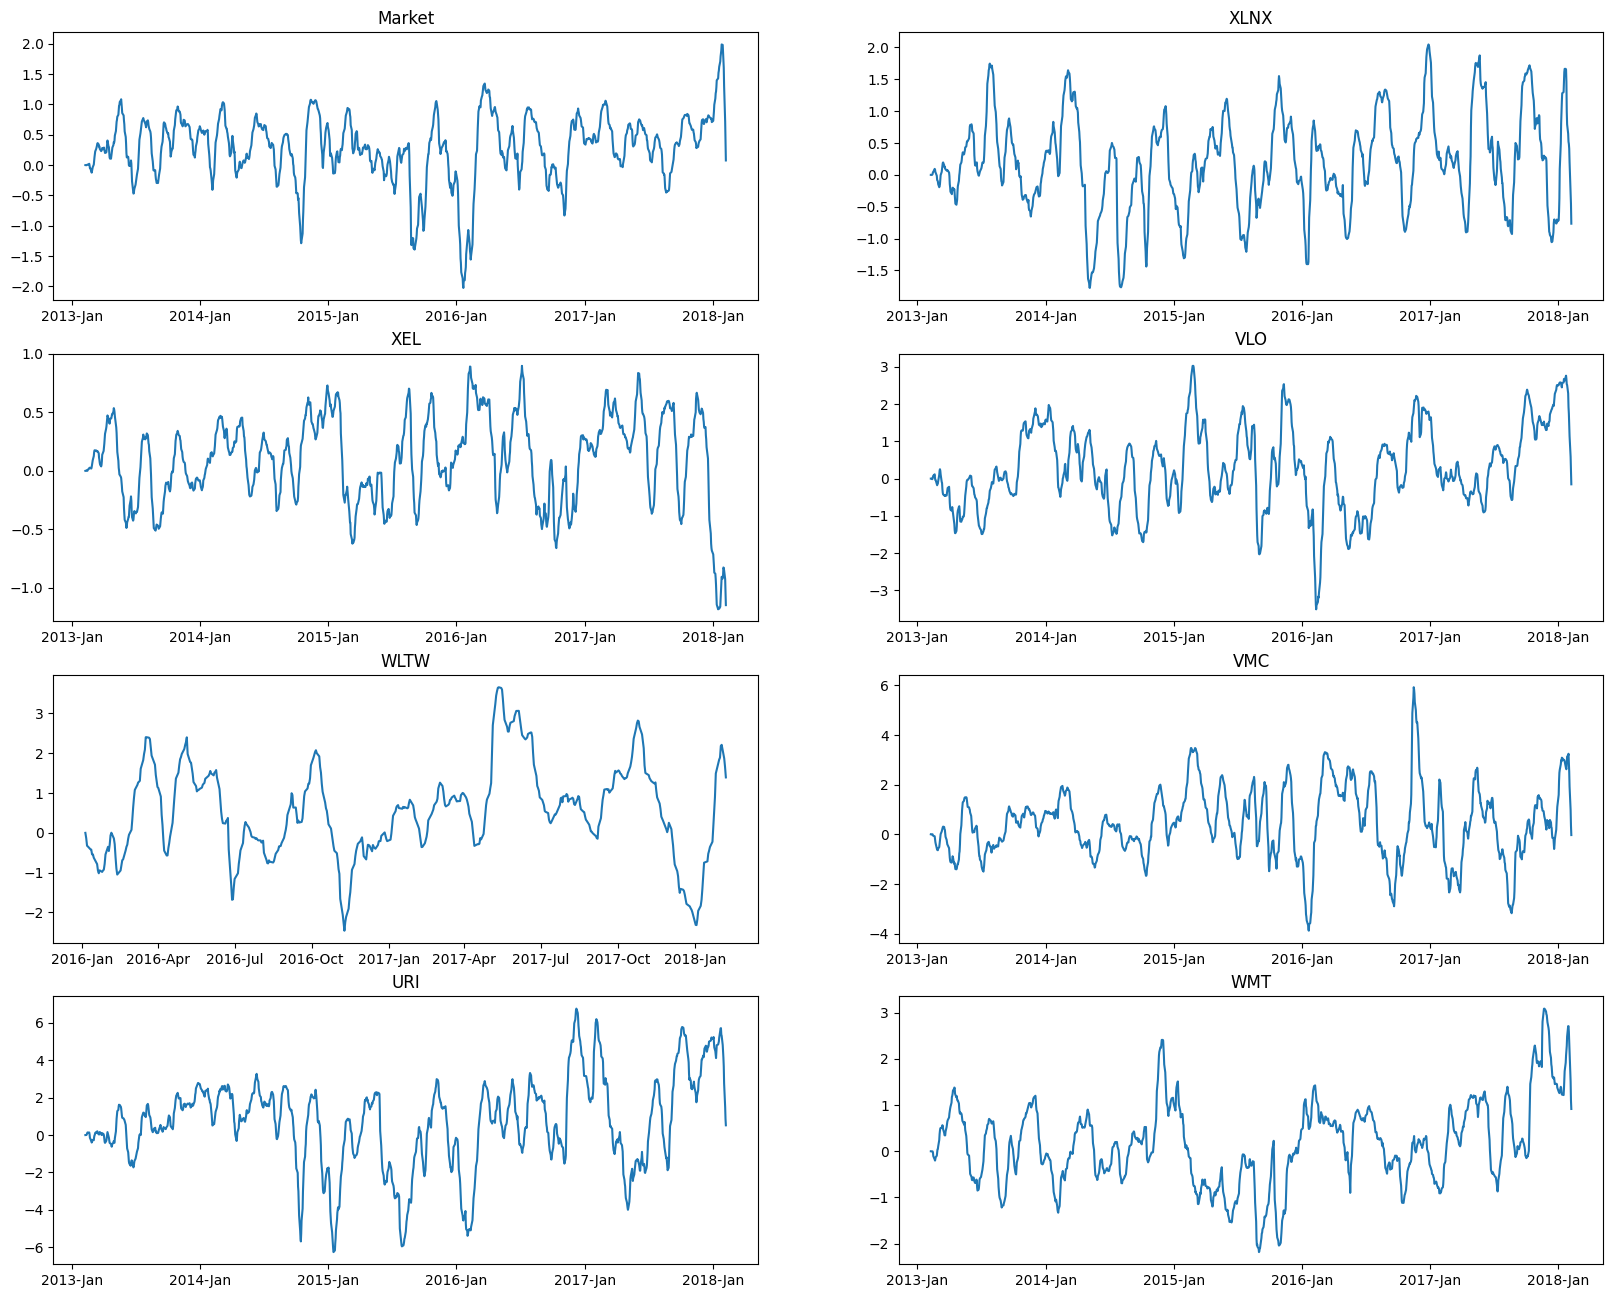

In [ ]:
#EDA
#MACD - Data Prep
__macd = "MACD"

df_market_macd = df_market.copy()
df_market_macd[__macd] = df_market_macd[__close].ewm(span=12).mean() - df_market_macd[__close].ewm(span=26).mean()

df_test_macd = df_test.copy()
df_blank = pd.DataFrame()
for i, stock in enumerate(stock_list):
  df_temp = df_test[df_test[__stock]==stock].copy()
  df_temp = df_temp[__close].ewm(span=12).mean() - df_temp[__close].ewm(span=26).mean()
  df_blank = pd.concat([df_blank, df_temp.to_frame()], ignore_index=False)

df_test_macd[__macd] = df_blank

#MACD - Data Viz
plt.figure(figsize=(20,16))
#
plt.subplot(4,2,1)
plt.title(__market)
dateFormat = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dateFormat)
#
plt.plot(df_market_macd[__macd])
#
for i, stock in enumerate(stock_test_list, 2):
  plt.subplot(4,2, i)
  plt.title(stock)
  dateFormat = mdates.DateFormatter('%Y-%b')
  plt.gca().xaxis.set_major_formatter(dateFormat)
  #
  df_temp = df_test_macd[df_test_macd[__stock]==stock].copy()
  df_temp.set_index(__date,inplace=True)
  plt.plot(df_temp[__macd])

##EDA - Daily Return

Daily returns are a fundamental metric for evaluating the profitability of investments. By calculating and visualizing daily returns, investors can understand how the value of their investments is changing on a day-to-day basis. Comparing the daily returns of individual stocks against the market helps to assess their relative performance and identify opportunities for potential gains or risks of losses.

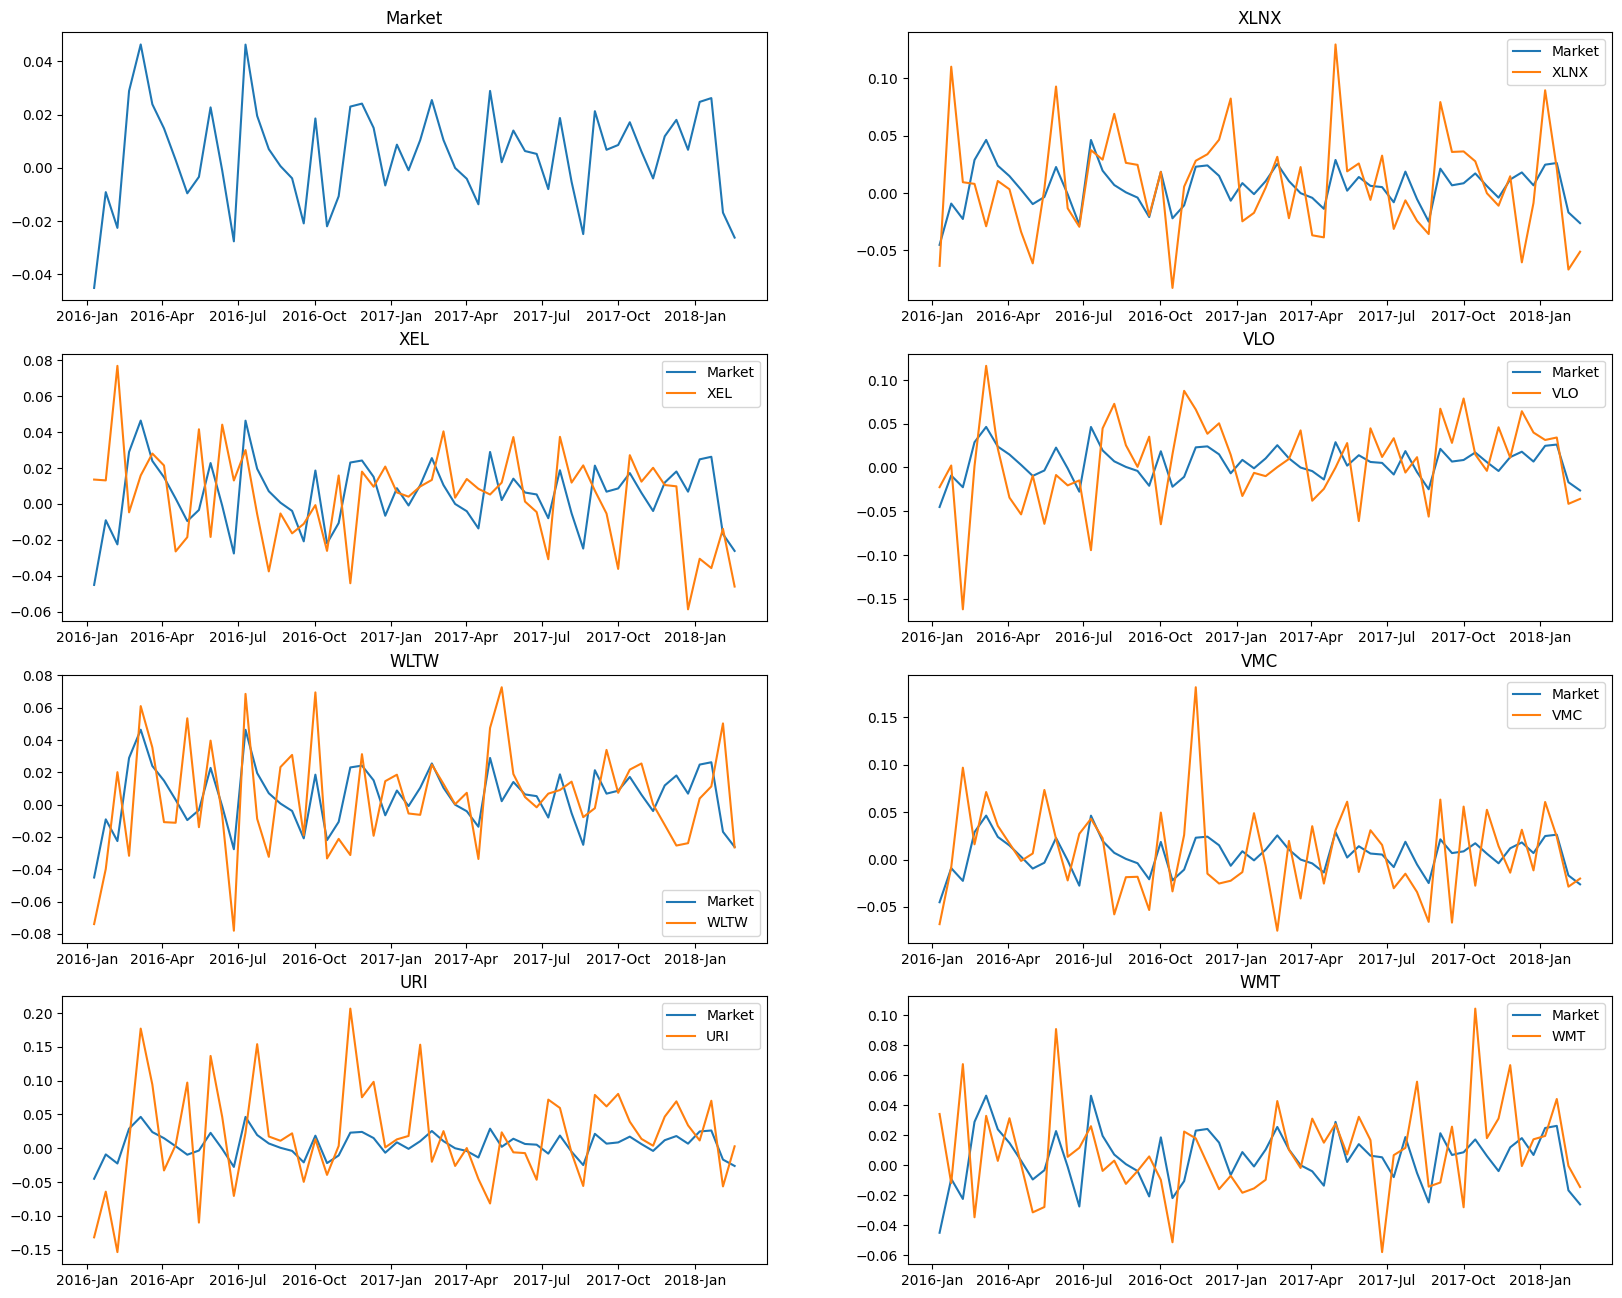

In [ ]:
#EDA
#Daily Return - Data Prep
__dailyReturn = "Daily_Return"

df_market_dr = df_market.copy()
df_market_dr[__dailyReturn] = df_market_dr[__close].pct_change()
df_all_dr = pd.DataFrame()
df_all_dr[__market] = df_market_dr[__dailyReturn]

df_test_dr = pd.DataFrame()
for i, stock in enumerate(stock_test_list):
  df_temp = df_test[df_test[__stock]==stock].copy()
  df_temp[__dailyReturn] = df_temp[__close].pct_change()
  df_test_dr = pd.concat([df_test_dr, df_temp], ignore_index=True)
  df_temp = df_temp[[__date,__dailyReturn]].copy().rename(columns={__dailyReturn: stock})
  df_temp.set_index(__date,inplace=True)
  df_all_dr = pd.merge(df_all_dr, df_temp[stock],
                            left_index=True, right_index=True, how='inner')

#Daily Return - Data Viz
df_temp = df_all_dr.copy().resample("2W").sum()
plt.figure(figsize=(20,16))
#
plt.subplot(4,2, 1)
plt.title(__market)
dateFormat = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dateFormat)
#
plt.plot(df_temp[__market])
#
for i, stock in enumerate(stock_test_list, 2):
  plt.subplot(4,2, i)
  plt.title(stock)
  dateFormat = mdates.DateFormatter('%Y-%b')
  plt.gca().xaxis.set_major_formatter(dateFormat)
  #
  plt.plot(df_temp[[__market,stock]])
  plt.legend([__market,stock])

##EDA - Beta
Beta provides a numerical representation of a stock's risk relative to the market. A Beta of 1 indicates that the stock's price tends to move in line with the market. A Beta greater than 1 suggests the stock is more volatile than the market, while a Beta less than 1 indicates the stock is less volatile.

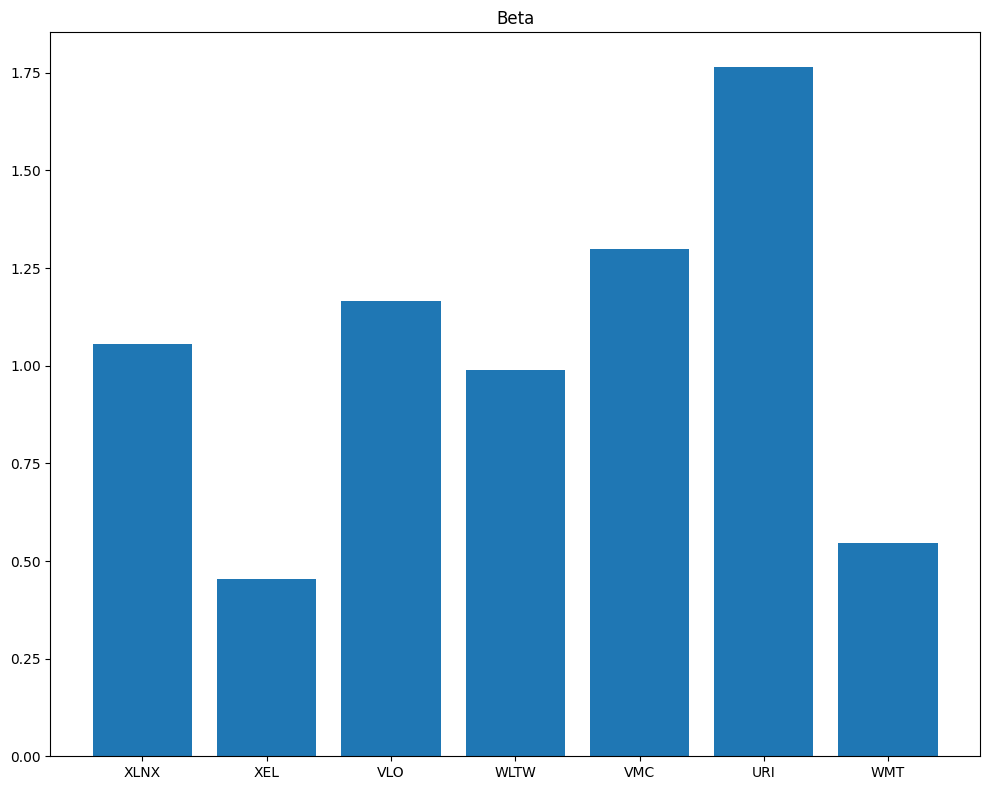

In [ ]:
#EDA
#Beta - Data Prep
__beta = "Beta"

model = LinearRegression()
df_beta = pd.DataFrame()

for i, stock in enumerate(stock_test_list):
  df_temp = df_test_dr[df_test_dr[__stock]==stock].copy()
  df_temp.set_index(__date,inplace=True)
  df_temp = pd.merge(df_market_dr[[__dailyReturn]], df_temp[__dailyReturn],
                            left_index=True, right_index=True, how='inner')
  df_temp.dropna(subset=df_temp.columns,inplace=True)
  model.fit(df_temp[[df_temp.columns[0]]], df_temp[[df_temp.columns[1]]])
  beta = model.coef_[0]
  df_beta[stock] = beta

df_beta = df_beta.T.reset_index()
df_beta.columns = [__stock, __beta]
df_beta.set_index(__stock, inplace=True)

#Beta - Data Viz
plt.figure(figsize=(10,8))
plt.title(__beta)
#
plt.bar(df_beta.index,df_beta[__beta])
plt.tight_layout()

##EDA - Risk and Volatility Analysis
The risk and volatility analysis using rolling standard deviation helps you gain insights into the fluctuations and risk associated with individual stocks and the market. This information is vital for making informed investment decisions based on your risk tolerance and investment goals.

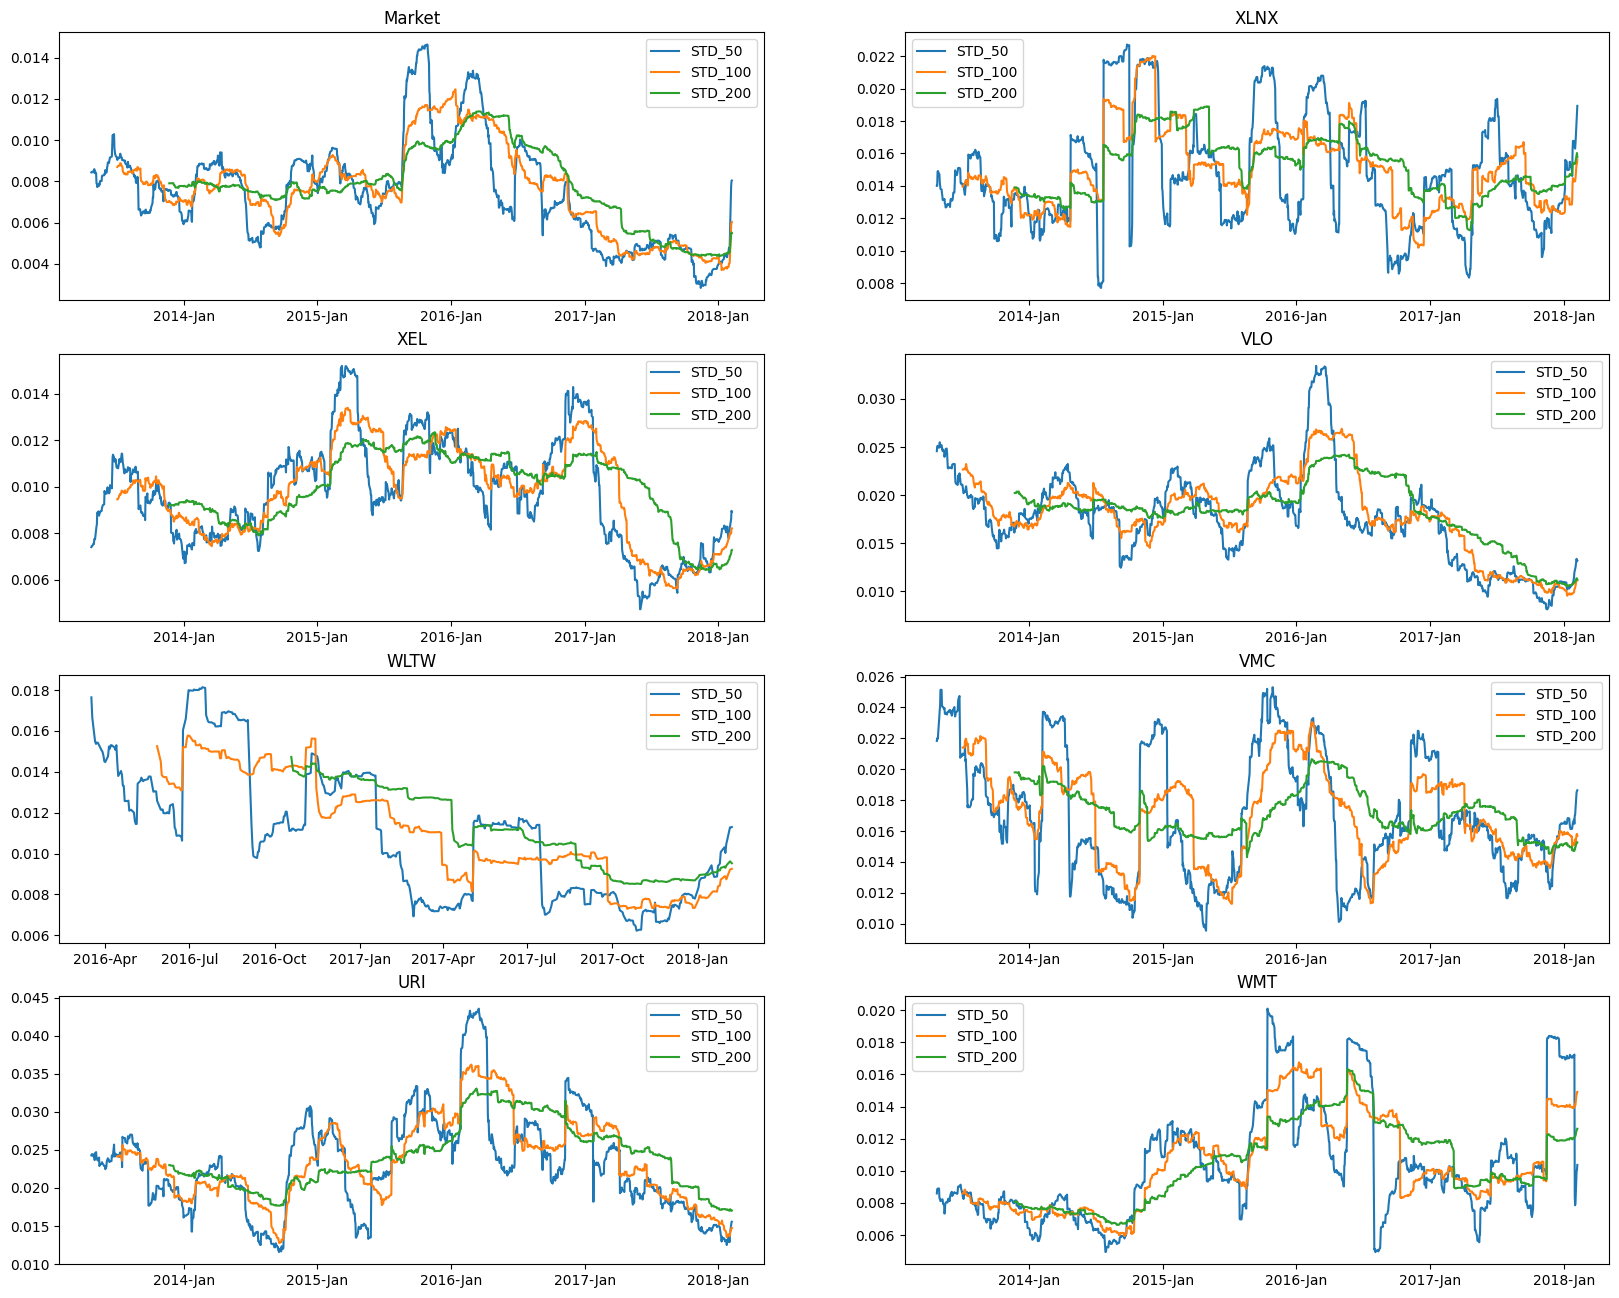

In [ ]:
#EDA
#Risk and Volatility - Data Prep
__std = "STD"

rv_interval = [50,100,200]

df_market_rv = df_market_dr.copy()
for i, interval in enumerate(rv_interval):
  df_market_rv[__std+__seperator+str(interval)] = df_market_rv[__dailyReturn].rolling(window=interval).std()

df_test_rv = pd.DataFrame()
for i, stock in enumerate(stock_list,1):
  df_temp = df_test_dr[df_test_dr[__stock]==stock].copy()
  for ii, interval in enumerate(rv_interval):
    df_temp[__std+__seperator+str(interval)] = df_temp[__dailyReturn].rolling(window=interval).std()
  df_test_rv = pd.concat([df_test_rv, df_temp], ignore_index=True)

#Risk and Volatility Analysis - Data Viz
plot_rv_list = [__std+__seperator+str(interval) for interval in rv_interval]
plt.figure(figsize=(20,16))
#
plt.subplot(4,2,1)
plt.title(__market)
dateFormat = mdates.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dateFormat)
#
plt.plot(df_market_rv[plot_rv_list])
plt.legend(plot_rv_list)
#
for i, stock in enumerate(stock_test_list, 2):
  plt.subplot(4,2, i)
  plt.title(stock)
  dateFormat = mdates.DateFormatter('%Y-%b')
  plt.gca().xaxis.set_major_formatter(dateFormat)
  #
  df_temp = df_test_rv[df_test_rv[__stock]==stock].copy()
  df_temp.set_index(__date,inplace=True)
  plt.plot(df_temp[plot_rv_list])
  plt.legend(plot_rv_list)

In [ ]:
df_out = df_market.copy()
df_out.reset_index(inplace=True)
df_out[__stock] = __market
df_out = pd.concat([df_out, df_test])

df_temp = df_market_ma.copy()
df_temp.reset_index(inplace=True)
df_temp[__stock] = __market
df_temp = pd.concat([df_temp, df_test_ma])
for i, interval in enumerate(ma_interval):
  df_out[__ma+__seperator+str(interval)] = df_temp[__ma+__seperator+str(interval)]

df_temp = df_market_macd.copy()
df_temp.reset_index(inplace=True)
df_temp[__stock] = __market
df_temp = pd.concat([df_temp, df_test_macd])
df_out[__macd] = df_temp[__macd]

df_temp = df_market_dr.copy()
df_temp.reset_index(inplace=True)
df_temp[__stock] = __market
df_temp = pd.concat([df_temp, df_test_dr])
df_out[__dailyReturn] = df_temp[__dailyReturn]

df_temp = df_market_rv.copy()
df_temp.reset_index(inplace=True)
df_temp[__stock] = __market
df_temp = pd.concat([df_temp, df_test_rv])
for i, interval in enumerate(rv_interval):
  df_out[__std+__seperator+str(interval)] = df_temp[__std+__seperator+str(interval)]

df_out.to_excel(fullPath / "out.xlsx", index=False)
df_beta.to_excel(fullPath / "beta.xlsx", index=True)

##EDA - Correlation of stocks and market using Closing price and Daily Return
The correlation analysis in your project helps you understand the relationships between stock prices and the market, which is crucial for:

+ Risk Management: Identifying stocks that are highly correlated with the market can help assess and manage portfolio risk.
+ Diversification: Building a diversified portfolio by including stocks with low or negative correlations.
+ Investment Strategy: Developing investment strategies based on the identified relationships between stocks and the market.



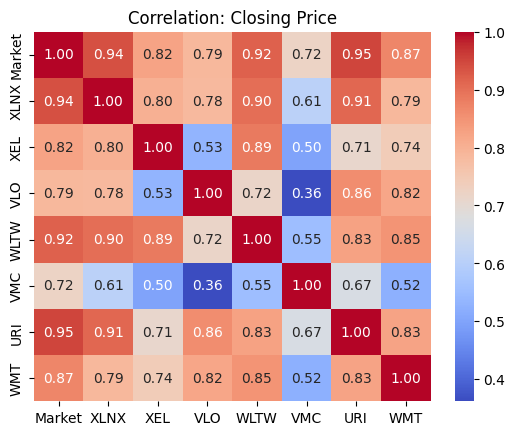

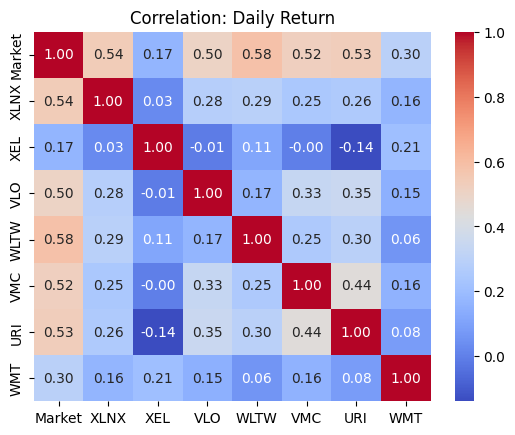

In [ ]:
#EDA
#Correlation - Data Prep

df_all_close = df_market.copy().loc[:,__close].to_frame()
df_all_close.rename(columns={__close: __market}, inplace=True)

for i, stock in enumerate(stock_test_list):
  df_temp = df_test[df_test[__stock]==stock].copy()
  df_temp.set_index(__date,inplace=True)
  df_temp = df_temp.loc[:,__close].to_frame()
  df_temp.rename(columns={__close: stock}, inplace=True)
  df_all_close = pd.merge(df_all_close, df_temp,
                            left_index=True, right_index=True, how='inner')

plt.title("Correlation: Closing Price")
sns.heatmap(df_all_close.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()
plt.title("Correlation: Daily Return")
sns.heatmap(df_all_dr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


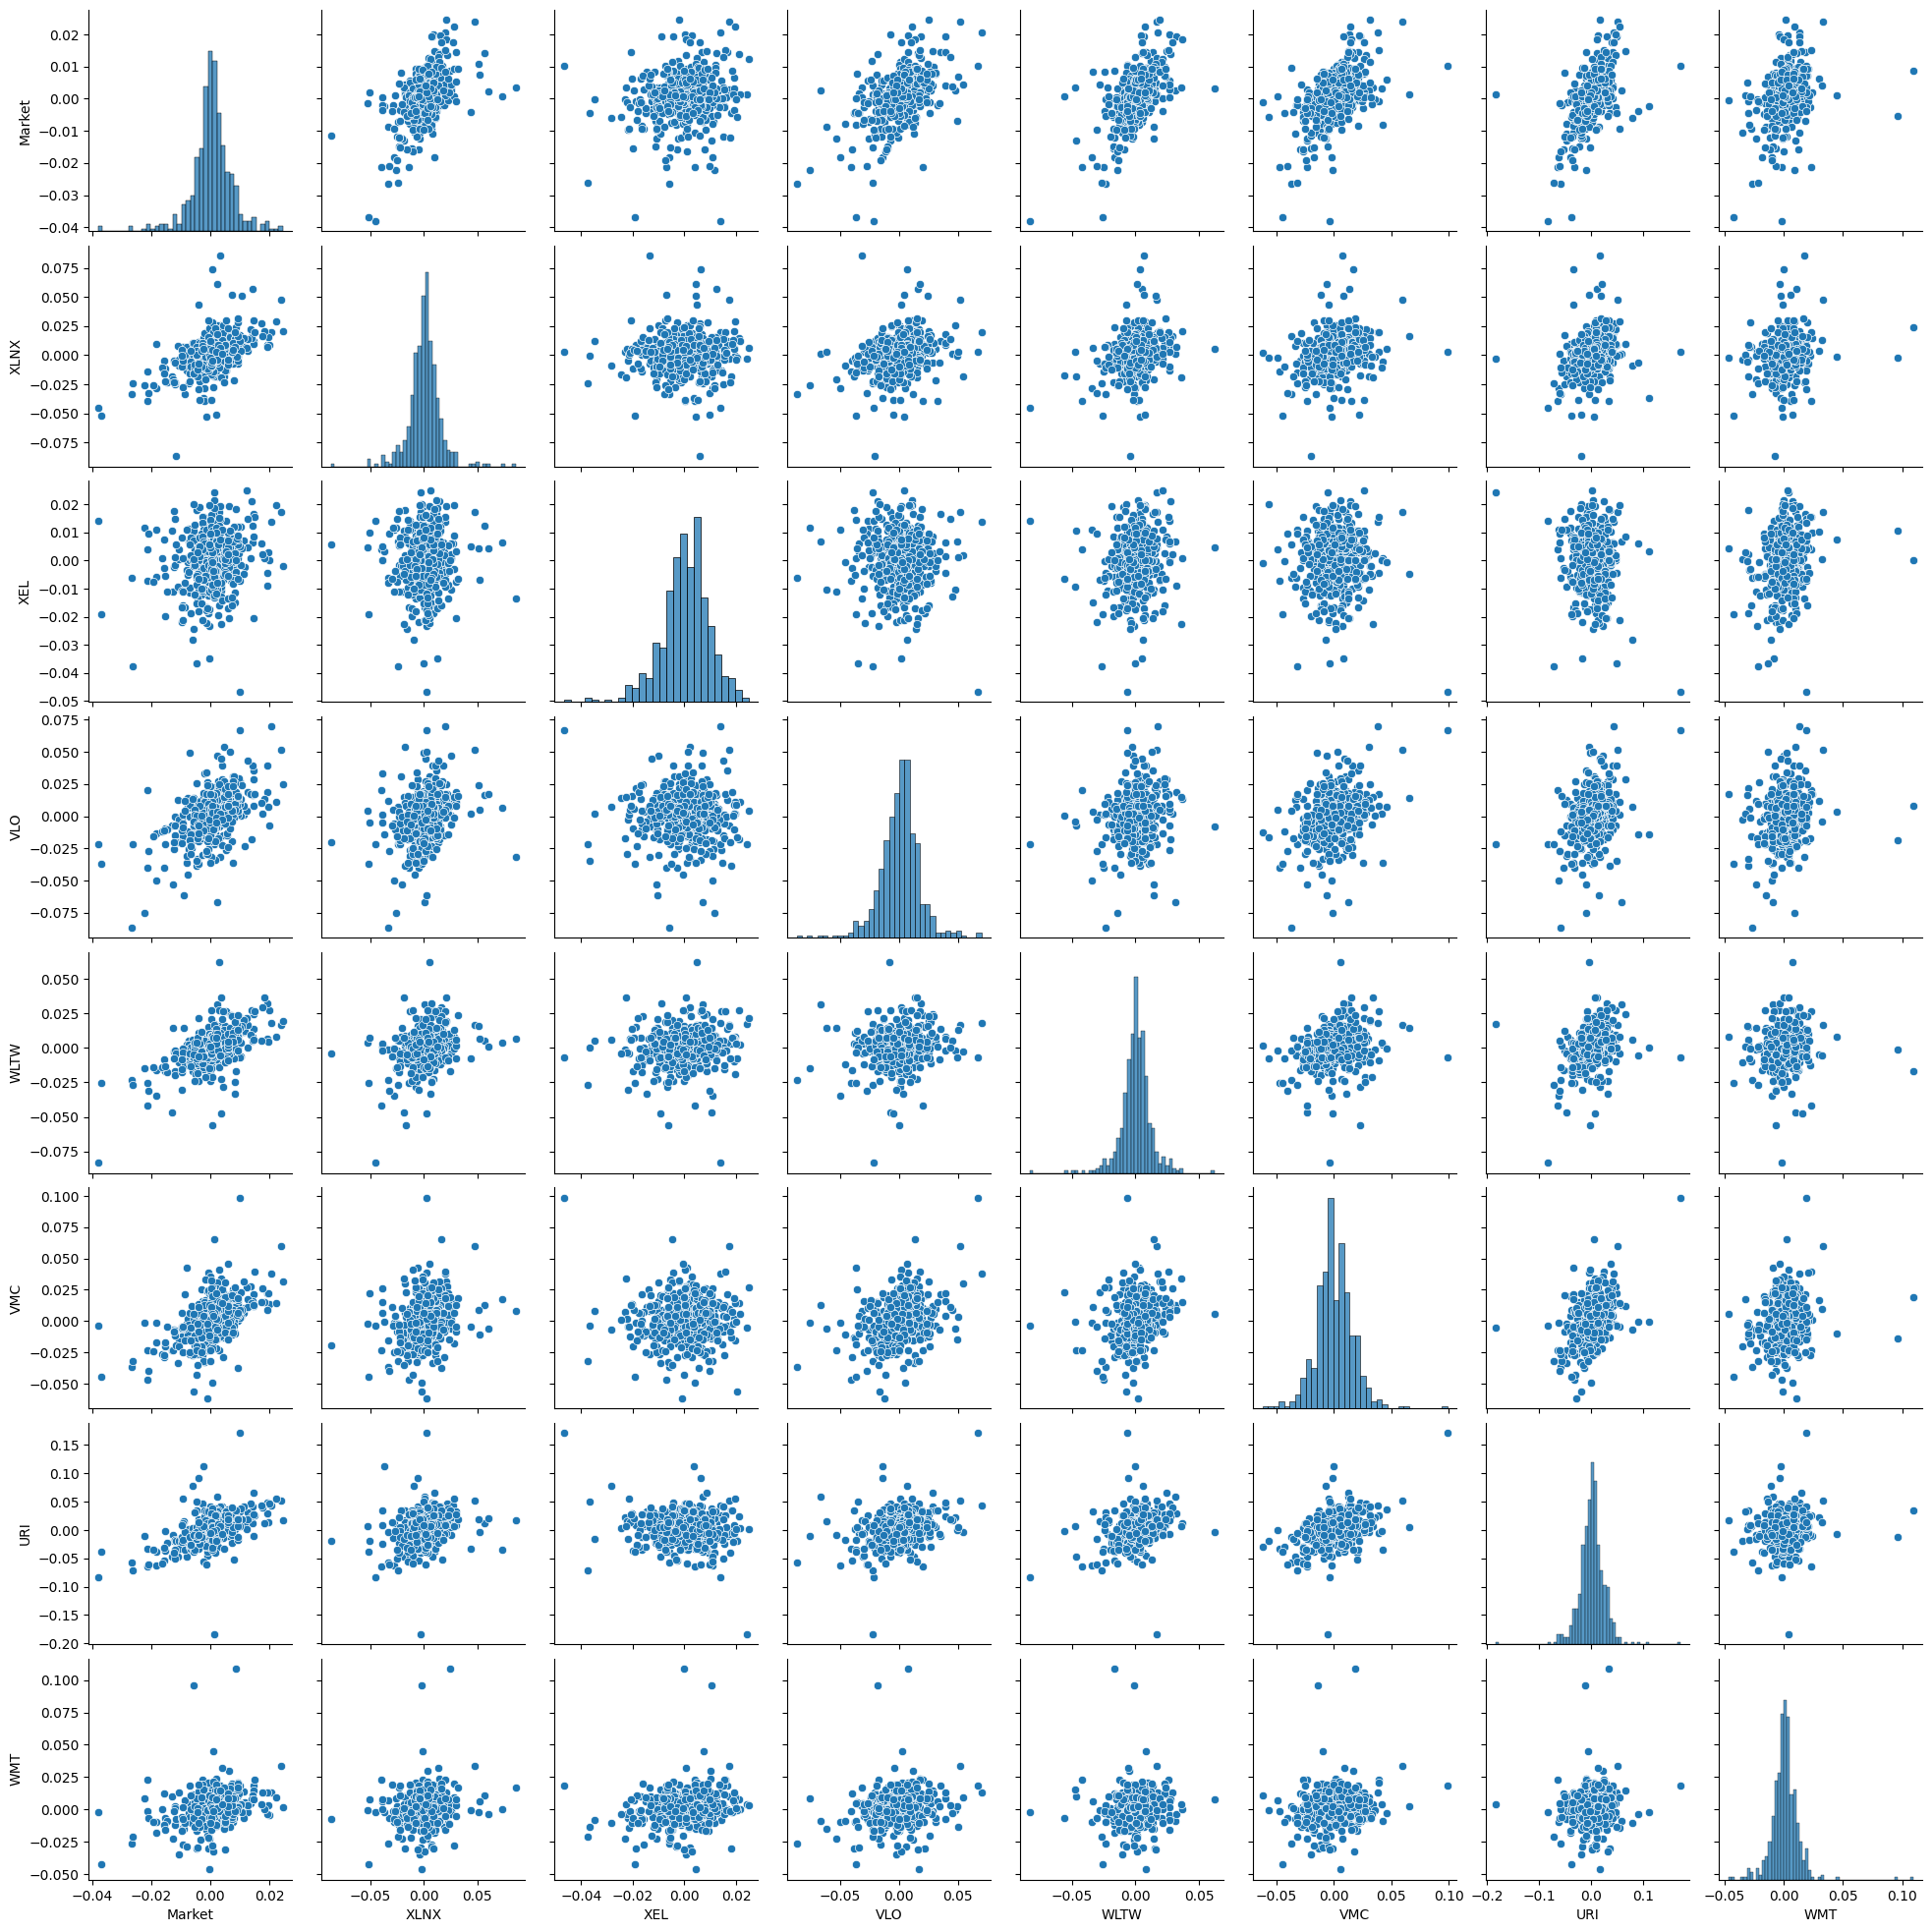

In [ ]:
sns.pairplot(df_all_dr)

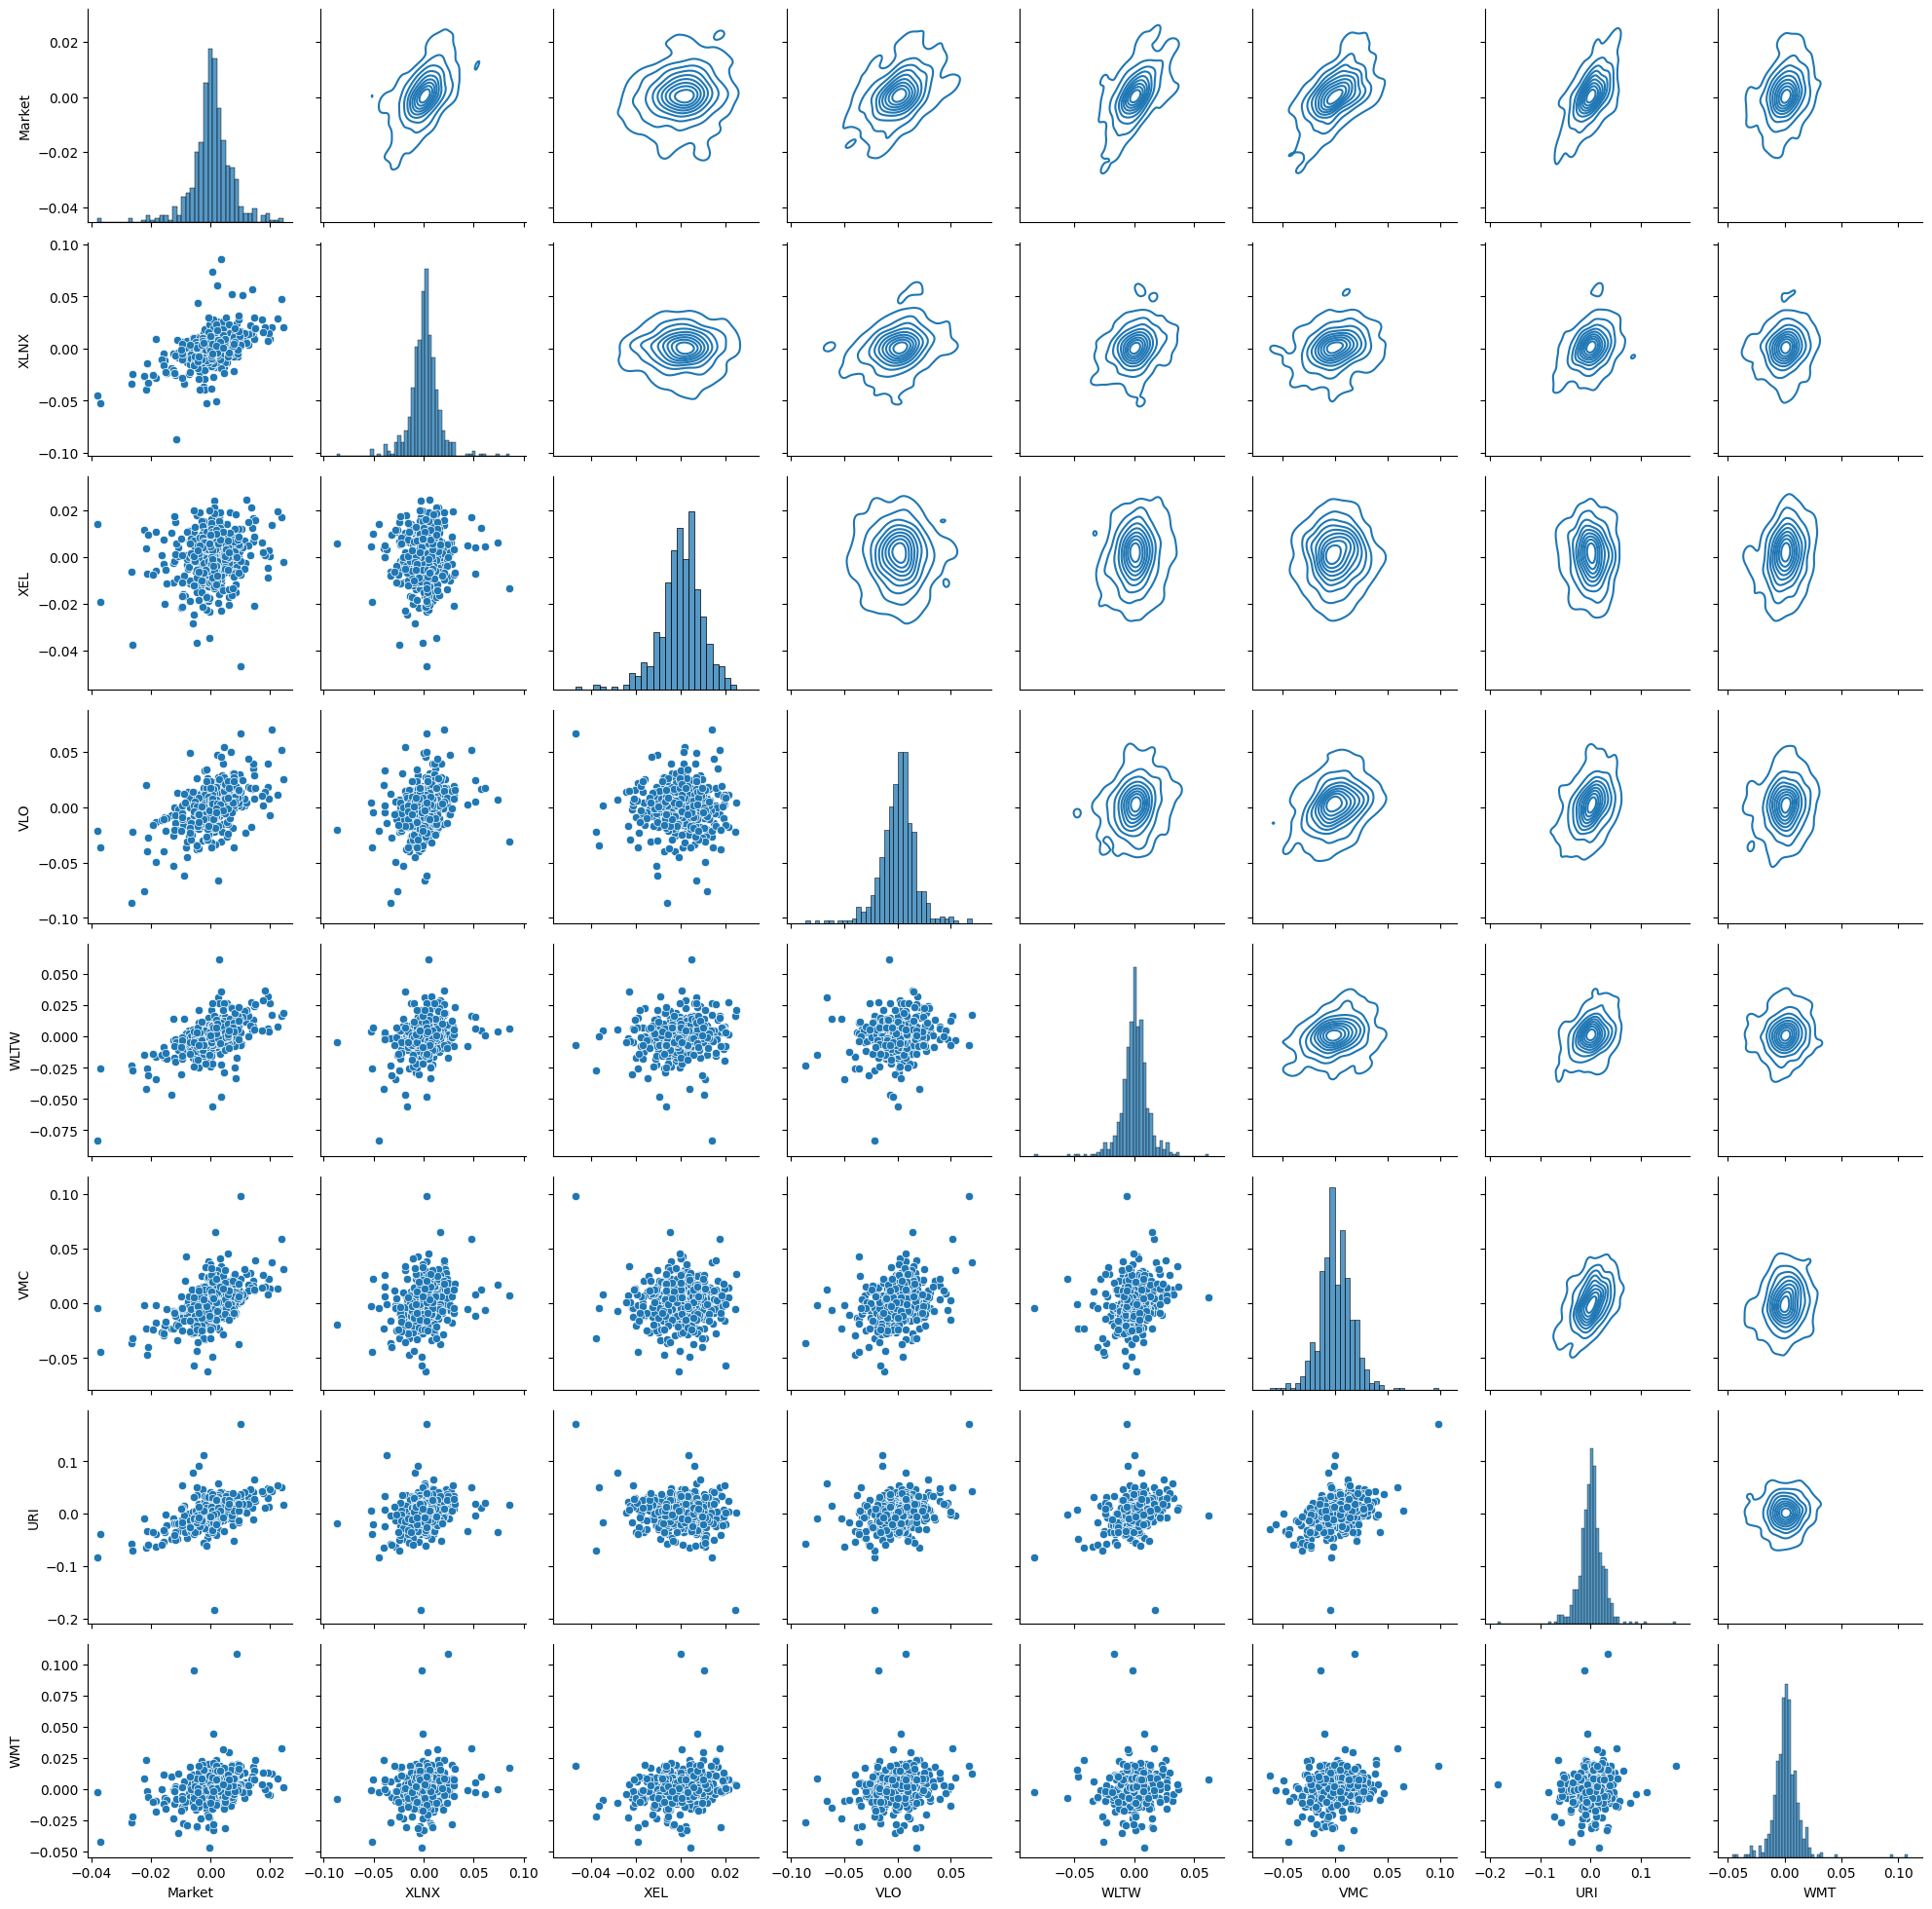

In [ ]:
grid = sns.PairGrid(df_all_dr)
grid.map_diag(sns.histplot)
grid.map_lower(sns.scatterplot)
grid.map_upper(sns.kdeplot)